# Capas convolucionales

En primer lugar, vamos a cargar y preprocesar un par de imágenes de muestra, utilizando la función `load_sample_image()` de ScikitLearn y las capas `CenterCrop` y `Rescaling` de Keras.

### Cargar imágenes de ejemplo

Carguemos dos imágenes de ejemplo, reescalemos sus valores de píxel a 0-1 y recórtemoslas por el centro para convertirlas en pequeñas imágenes de 70×120.


In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

Hay dos imágenes de muestra, lo que explica la primera dimensión.

Luego, cada imagen es de 70 × 120, ya que ése es el tamaño que especificamos al crear la capa `CenterCrop` (las imágenes originales eran de 427 × 640). Esto explica las dimensiones segunda y tercer dimensión.

Por último, cada píxel contiene un valor por canal de color, y hay tres: rojo, verde y azul (RGB), lo que explica la última dimensión.

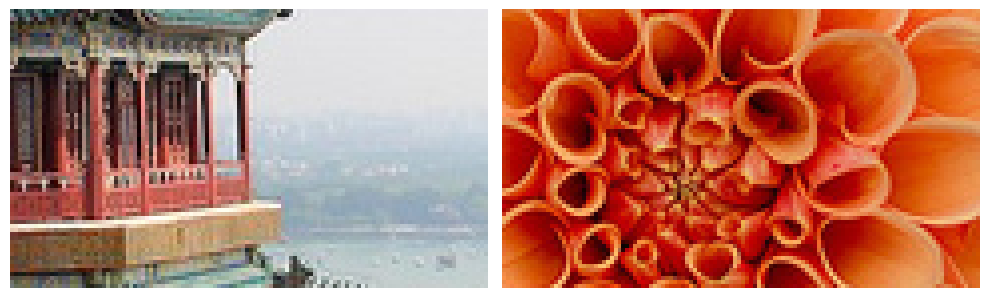

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(images[1], cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

### Crear y aplicar filtros

Ahora vamos a crear una capa convolucional 2D y alimentarla con estas imágenes para ver qué sale. Para ello, Keras proporciona una capa `Convolution2D`, también llamada `Conv2D`.

Vamos a crear una capa convolucional con 32 filtros, cada uno de tamaño 7 × 7 (usando `kernel_size=7`), y aplicar esta capa a las dos imágenes

In [ ]:
tf.random.set_seed(42)  # para que los resultados son reproducibles
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=(7), padding="same")
fmaps = conv_layer(images)  # Aplicamos la capa convolucional

`fmaps` contendrá los mapas de características resultantes después de aplicar los 32 filtros de convolución a cada imagen de entrada.

In [ ]:
conv_layer.weights[0].shape

TensorShape([7, 7, 3, 32])

In [ ]:
conv_layer.bias

<tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

La capa convolucional aplica 32 filtros, cada uno de 7x7 (debido a que `kernel_size=7`) a los 3 canales (RGB).

El valor de los filtros se ajusta de manera aleatoria para que puedan ser ajustados durante el entrenamiento en la red neuronal convolucional.

Cuando hablamos de una capa convolucional 2D, **"2D"** se refiere al número de dimensiones espaciales (alto y ancho), pero como puede ver, la capa toma entradas 4D: las dos dimensiones adicionales son el tamaño del lote (primera dimensión) y los canales (última dimensión).

In [ ]:
# Ahora veamos la forma de la salida

fmaps.shape

TensorShape([2, 70, 120, 32])

La forma de salida es similar a la de entrada, con dos diferencias principales.

En primer lugar, hay 32 canales en lugar de 3. Esto se debe a que hemos establecido `filters=32`, por lo que obtenemos 32 mapas de características de salida.

En segundo lugar, la altura y la anchura se han reducido en 6 píxeles. Esto se debe al hecho de que la capa `Conv2D` no utiliza ningún relleno cero por defecto (*zero padding*), lo que significa que perdemos algunos píxeles en los lados de los mapas de características de salida, dependiendo del tamaño de los filtros. En este caso, como el tamaño del núcleo (*kernel size*) es 7, perdemos 6 píxeles horizontalmente y 6 píxeles verticalmente (es decir, 3 píxeles a cada lado).

### Visualicemos los filtros aplicados a cada imagen

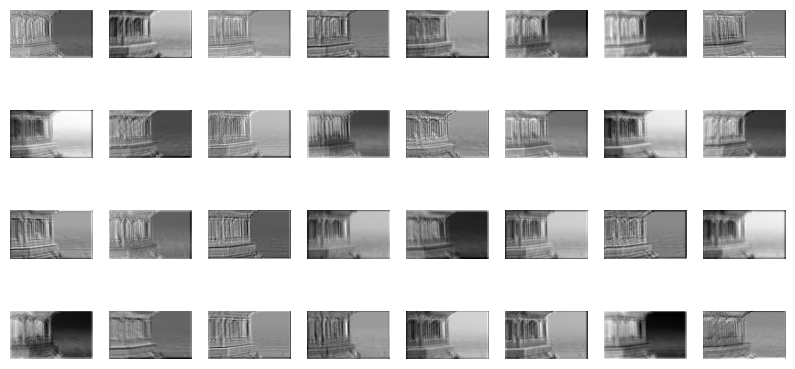

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(fmaps[0, :, :, i], cmap="gray")
    plt.axis("off")
plt.show()

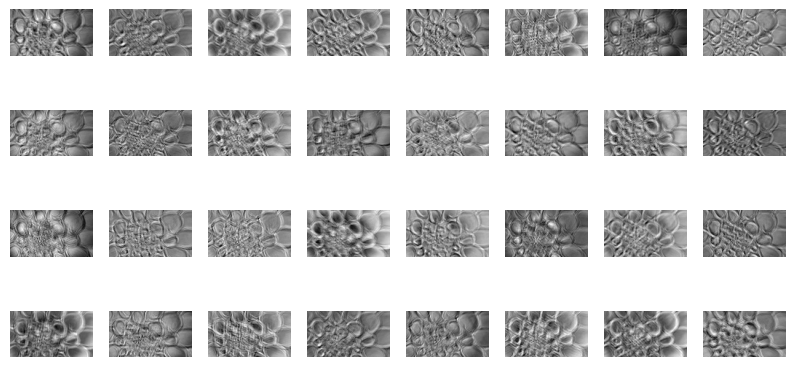

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(fmaps[1, :, :, i], cmap="gray")
    plt.axis("off")
plt.show()

# *Pooling layers*

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

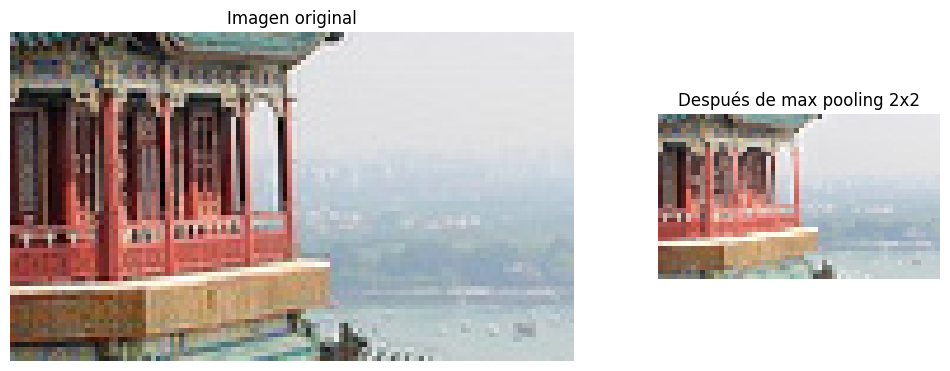

In [ ]:
# Implementar un max pooling de 2x2
import matplotlib.pyplot as plt
import matplotlib as mpl

max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
output = max_pool(images)
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1/2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Imagen original")
ax1.imshow(images[0])  # graficar la 1er imagen
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Después de max pooling 2x2")
ax2.imshow(output[0])  # graficar la 1er imagen después de max pooling
ax2.axis("off")
plt.show()

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
output.shape

TensorShape([2, 35, 60, 3])

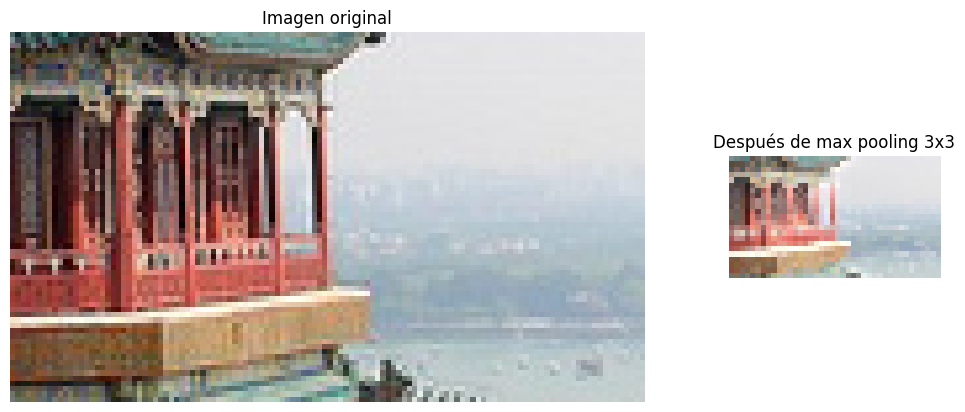

In [ ]:
# Implementar un max pooling de 3x3

max_pool = tf.keras.layers.MaxPool2D(pool_size=3)
output = max_pool(images)
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1/3])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Imagen original")
ax1.imshow(images[0])  # graficar la 1er imagen
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Después de max pooling 3x3")
ax2.imshow(output[0])  # graficar la 1er imagen después de max pooling
ax2.axis("off")
plt.show()

In [ ]:
output.shape

TensorShape([2, 23, 40, 3])

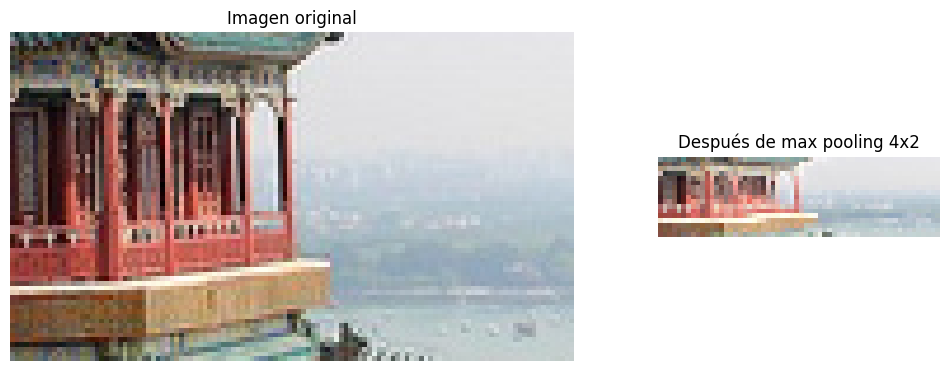

In [ ]:
# El pooling no tiene que ser cuadrado, aunque es lo más común
# Implementar un max pooling de 4x2

max_pool = tf.keras.layers.MaxPool2D(pool_size=(4,2))
output = max_pool(images)
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1/2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Imagen original")
ax1.imshow(images[0])  # graficar la 1er imagen
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Después de max pooling 4x2")
ax2.imshow(output[0])  # graficar la 1er imagen después de max pooling
ax2.axis("off")
plt.show()

In [ ]:
output.shape

TensorShape([2, 17, 60, 3])